In [38]:
import json
import time
import pandas as pd
from os.path import expanduser
import sys
import os
import numpy as np
import glob

#os.chdir('pysd2cat')
#!{sys.executable} setup.py develop --user --uninstall
#!{sys.executable} setup.py develop --user 
#os.chdir(os.pardir)

from pysd2cat.analysis.correctness import compute_correctness_all, compute_correctness_with_classifier
from pysd2cat.data import pipeline 
from pysd2cat.analysis.live_dead_analysis import add_live_dead_test_harness

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pipeline.get_experiment_ids()

['experiment.transcriptic.r1bcc65suuqrj',
 'experiment.transcriptic.r1cbut3veu2z4_r1cc6efukqtxx',
 'experiment.transcriptic.r1bd4arh2jwg6',
 'experiment.transcriptic.r1bfbfd7f8dn5',
 'experiment.transcriptic.r1cckyfwfae4d_r1ccq83ggacxc',
 'experiment.transcriptic.r1cgbw7hjvxgx_r1cgjxrexhd4j',
 'experiment.transcriptic.r1bd6ma3q8btb',
 'experiment.transcriptic.r1ceuab227w5q_r1cf3jgv8pegg',
 'experiment.transcriptic.r1cfkpp2p3kjz_r1cftpr8wxqc7',
 'experiment.transcriptic.r1c84xwx57y95_r1c8ejz8jfg9z',
 'experiment.transcriptic.r1cctubuxvmvs_r1cctubuxvmvs',
 'experiment.transcriptic.r1c84xy5frkf3_r1c8ejr9kezva',
 'experiment.transcriptic.r1bcfncn8xeys',
 'experiment.transcriptic.r1bsqh78n5jeq_r1bsxfcwtsbmt',
 'experiment.transcriptic.r1ceuhu9enre5_r1cf33y4j6dyg',
 'experiment.transcriptic.r1c8xx6qe9eea_r1c93enbf48t7',
 'experiment.transcriptic.r1c8xx94j94u7_r1c93ajvdzxz5',
 'experiment.transcriptic.r1cctw8wvwpbg_r1ccwteetw82v',
 'experiment.transcriptic.r1bg3ssmxkzdt',
 'experiment.transcr

In [45]:
## Get the data
#ex_id = 'experiment.transcriptic.r1c5va879uaex_r1c639xp952g4'
ex_id = 'experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u'
samples = pipeline.get_experiment_samples(ex_id, 'FCS')
sample_records = pipeline.get_metadata_dataframe(samples).drop_duplicates()
df = pipeline.get_xplan_data_and_metadata_df(sample_records, '', max_records=30000)
print(len(df))
df = add_live_dead_test_harness(df)
print(len(df))

Getting xplan dataframe for experiment...
2764226
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:32:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.14 seconds
Testing time was: 0.42 seconds
Prediction time of untested data was: 12.88457727432251

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RLkAEyrQdNzb  2019-05-31  18:32:22  random_forest_classification  Hamed        0.994     0.991              0.999      1.0                0.996     0.994      0.997  

In [46]:
## Calculate different measures on data
#correctness_df = compute_correctness_all(df, high_control='NOR 00 Control')
correctness_df = compute_correctness_with_classifier(df, 
                                                high_control='NOR 00 Control', 
                                                use_harness=False)
print(len(df))
correctness_h_df = compute_correctness_with_classifier(df, 
                                                  high_control='NOR 00 Control', 
                                                  use_harness=True)
print(len(df))

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


MAE: 0.023105955997422444
Predicting live...


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2764226
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.46 seconds
Testing time was: 0.42 seconds
Prediction time of untested data was: 13.230252265930176

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Z6DvVpo2JG7w  2019-05-31  18:35:50  random_forest_classification  Hamed        0.977     0.976              0.996      0.996              0.974     0.98       0.968   43448            10863           Random 

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2764226


In [47]:
df['strain_name'].value_counts()

UWBF_XNOR_00               240000
UWBF_XNOR_11               240000
UWBF_XNOR_10               240000
UWBF_XNOR_01               240000
UWBF_NOR_11                120000
UWBF_NAND_00               120000
UWBF_NAND_01               120000
UWBF_NOR_00                120000
UWBF_NAND_11               120000
UWBF_NOR_01                120000
UWBF_NAND_10               120000
UWBF_NOR_10                120000
UWBF_OR_11                 60000 
UWBF_AND_01                60000 
UWBF_XOR_00                60000 
UWBF_XOR_10                60000 
UWBF_AND_10                60000 
UWBF_AND_00                60000 
UWBF_OR_01                 60000 
UWBF_AND_11                60000 
UWBF_XOR_11                60000 
UWBF_OR_10                 60000 
UWBF_XOR_01                60000 
UWBF_OR_00                 51762 
WT-Live-Control            30000 
SpheroControl2             30000 
beads_spherotech_pps_6K    30000 
NOR 00 Control             24311 
WT-Dead-Control            11689 
SpheroControl1

In [50]:

#df['strain_name'].value_counts()
correctness_df['mean_correct_classifier'].value_counts()
#np.mean(correctness_df.apply(lambda x: np.abs(x['mean_correct_classifier']- x['mean_correct_classifier_live']), axis=1))

0.973167    2
0.977067    1
0.979233    1
0.830900    1
0.999600    1
0.948500    1
0.913533    1
0.998400    1
0.482700    1
0.969200    1
0.969133    1
0.955700    1
0.994667    1
0.826700    1
0.868267    1
0.759467    1
0.575400    1
0.980233    1
0.417133    1
0.984033    1
0.754567    1
0.979300    1
0.425700    1
0.938700    1
0.984233    1
0.970367    1
0.954367    1
0.539800    1
0.567633    1
0.820200    1
           ..
0.785800    1
0.678633    1
0.964300    1
0.018933    1
0.974833    1
0.931867    1
0.961033    1
0.777967    1
0.646900    1
0.638633    1
0.994100    1
0.975633    1
0.771033    1
0.998533    1
0.528833    1
0.630267    1
0.983233    1
0.705967    1
0.954333    1
0.909800    1
0.967767    1
0.996900    1
0.960333    1
0.950000    1
0.981533    1
0.979033    1
0.985700    1
0.975767    1
0.987400    1
0.744500    1
Name: mean_correct_classifier, Length: 87, dtype: int64

KeyError: 'mean_correct_threshold'

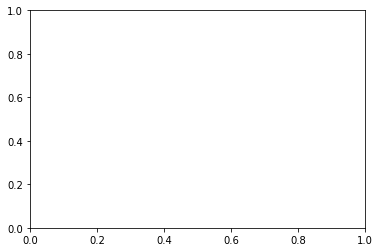

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_threshold_live'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('threshold_live')



Text(0, 0.5, 'classifier_live')

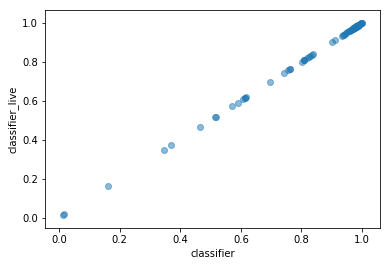

In [7]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_classifier'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('classifier')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier_live')

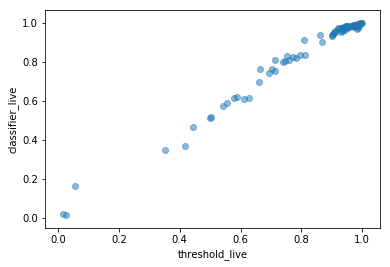

In [8]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold_live'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('threshold_live')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier')

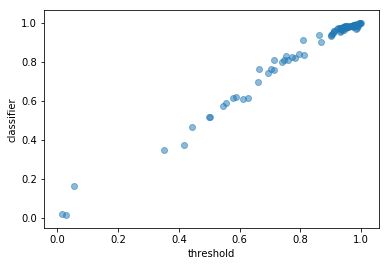

In [9]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_classifier'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('classifier')



Text(0, 0.5, 'classifier')

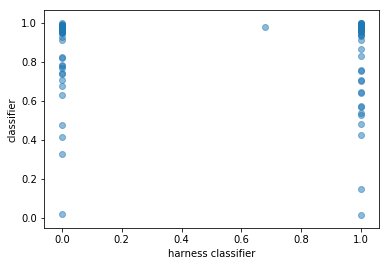

In [16]:
ax = plt.axes()
ax.scatter(correctness_h_df['mean_correct_classifier'], correctness_df['mean_correct_classifier'], alpha=0.5)
ax.set_xlabel('harness classifier')
ax.set_ylabel('classifier')


